# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ana Sittah Rosyidah, S.ST
- **Email:** ana5210@guru.smk.belajar.id
- **ID Dicoding:** ana_sittah_rosyidah

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana dampak keterlambatan pengiriman terhadap review score, nilai transaksi, dan repeat rate pelanggan pada periode 2017–2018?
- Pertanyaan 2 : Metode pembayaran mana yang menunjukkan loyalitas pelanggan paling stabil berdasarkan kombinasi rata-rata nilai transaksi dan repeat rate, serta apakah credit_card menjadi metode dengan volume transaksi tinggi dan repeat rate yang konsisten?

> Tambahkan blockquote



## Import Semua Packages/Library yang Digunakan

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


## Data Wrangling

### Gathering Data

In [281]:
# Load dataset
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
category_translation = pd.read_csv("data/product_category_name_translation.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")


In [282]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [283]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [284]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [285]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [286]:
customers.shape
orders.shape
order_payments.shape

(103886, 5)

In [287]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [288]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [289]:
#Kolom tanggal dikonversi ke format datetime agar dapat digunakan untuk analisis waktu.

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


**Insight:**
- Dataset mencakup seluruh alur bisnis e-commerce dari order hingga review.
- Terdapat variasi metode pembayaran dan cicilan.
- Data memungkinkan analisis perilaku pelanggan, performa seller, serta kualitas pengiriman.
- Model bisnis berbasis marketplace dengan banyak seller dan pelanggan dari berbagai wilayah.

### Assessing Data

In [290]:
#1. Cek Missing Valuecustomers.isnull().sum()
orders.isnull().sum()
products.isnull().sum()
order_reviews.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [291]:
#2. Cek Duplicate
customers.duplicated().sum()
orders.duplicated().sum()

np.int64(0)

In [292]:

#3. Cek Tipe Data
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [293]:

#4. Cek Statistik Deskriptif
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Terdapat missing value pada tahap pengiriman akhir yang mengindikasikan adanya order yang dibatalkan atau belum selesai diproses.
- Kolom timestamp masih bertipe object dan perlu dikonversi ke datetime untuk analisis berbasis waktu.
- Distribusi nilai transaksi bersifat right-skewed, dengan sebagian kecil transaksi bernilai tinggi yang memengaruhi rata-rata.
- Mayoritas pelanggan melakukan pembayaran satu kali (tanpa cicilan), namun tersedia opsi cicilan hingga 24x untuk transaksi bernilai besar.
- Sebagian order menggunakan lebih dari satu pembayaran (payment sequential > 1), menunjukkan adanya split atau retry payment.

### Cleaning Data

In [294]:
#1. Mengubah Format Tanggal
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

#2. Mengatasi Missing Value
#a) Missing pada review_comment_message (tidak kritikal)
order_reviews['review_comment_message'].fillna("No Review", inplace=True)

#b) Missing pada dimensi produk
products.fillna(products.median(numeric_only=True), inplace=True)

#3. Menghapus Duplicate
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)

#4. Mengatasi Outlier (Contoh pada payment_value)
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1

minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)

order_payments = order_payments[
    (order_payments['payment_value'] >= minimum) &
    (order_payments['payment_value'] <= maximum)
]

/var/folders/mh/g9f2v_2551zf9rxl16hn8sy40000gn/T/ipykernel_49075/3881486764.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_message'].fillna("No Review", inplace=True)


In [295]:
#Merge untuk Analisis
#ingin analisis total penjualan per pelanggan:
merged_df = orders.merge(customers, on='customer_id') \
                  .merge(order_items, on='order_id') \
                  .merge(order_payments, on='order_id')

merged_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


In [296]:
df = orders.merge(order_payments, on="order_id", how="left") \
           .merge(order_reviews, on="order_id", how="left") \
           .merge(customers, on="customer_id", how="left")
# Cek struktur awal
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104334 non-null  object        
 1   customer_id                    104334 non-null  object        
 2   order_status                   104334 non-null  object        
 3   order_purchase_timestamp       104334 non-null  datetime64[ns]
 4   order_approved_at              104158 non-null  object        
 5   order_delivered_carrier_date   102444 non-null  object        
 6   order_delivered_customer_date  101189 non-null  datetime64[ns]
 7   order_estimated_delivery_date  104334 non-null  object        
 8   payment_sequential             96464 non-null   float64       
 9   payment_type                   96464 non-null   object        
 10  payment_installments           96464 non-null   float64       
 11  

In [297]:
# Pastikan kolom tanggal dalam format datetime
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# Hitung delay (dalam hari)
df["delay_days"] = (
    df["order_delivered_customer_date"] - 
    df["order_estimated_delivery_date"]
).dt.days

# Jika negatif berarti tidak telat → ubah jadi 0
df["delay_days"] = df["delay_days"].apply(lambda x: x if x > 0 else 0)

# Buat kolom is_late (1 = telat, 0 = tepat waktu)
df["is_late"] = df["delay_days"].apply(lambda x: 1 if x > 0 else 0)

# =========================
# BUAT REPEAT CUSTOMER
# =========================

repeat = df.groupby("customer_unique_id")["order_id"].nunique().reset_index()
repeat.columns = ["customer_unique_id", "order_count"]

repeat["is_repeat_customer"] = (repeat["order_count"] > 1).astype(int)

# Hapus kolom lama kalau ada
df = df.drop(columns=[col for col in df.columns if "is_repeat_customer" in col], errors="ignore")

df = df.merge(
    repeat[["customer_unique_id", "is_repeat_customer"]],
    on="customer_unique_id",
    how="left"
)
df.to_csv("dashboard/main_data.csv", index=False)

In [298]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'delay_days', 'is_late', 'is_repeat_customer'],
      dtype='object')


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104334 non-null  object        
 1   customer_id                    104334 non-null  object        
 2   order_status                   104334 non-null  object        
 3   order_purchase_timestamp       104334 non-null  datetime64[ns]
 4   order_approved_at              104158 non-null  object        
 5   order_delivered_carrier_date   102444 non-null  object        
 6   order_delivered_customer_date  101189 non-null  datetime64[ns]
 7   order_estimated_delivery_date  104334 non-null  datetime64[ns]
 8   payment_sequential             96464 non-null   float64       
 9   payment_type                   96464 non-null   object        
 10  payment_installments           96464 non-null   float64       
 11  

In [300]:
# Reload ulang untuk memastikan file bersih
df = pd.read_csv("dashboard/main_data.csv")

# Cek struktur
df.info()

# Statistik delay
print(df[["delay_days", "is_late"]].describe())
print(df["is_late"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104334 non-null  object 
 1   customer_id                    104334 non-null  object 
 2   order_status                   104334 non-null  object 
 3   order_purchase_timestamp       104334 non-null  object 
 4   order_approved_at              104158 non-null  object 
 5   order_delivered_carrier_date   102444 non-null  object 
 6   order_delivered_customer_date  101189 non-null  object 
 7   order_estimated_delivery_date  104334 non-null  object 
 8   payment_sequential             96464 non-null   float64
 9   payment_type                   96464 non-null   object 
 10  payment_installments           96464 non-null   float64
 11  payment_value                  96464 non-null   float64
 12  review_id                     

In [301]:
# =========================
# STEP 1: Join orders + customers
# =========================
df = orders.merge(customers, on="customer_id", how="left")

# =========================
# STEP 2: Join order_items
# =========================
df = df.merge(order_items, on="order_id", how="left")

# =========================
# STEP 3: Join payments (aggregasi per order)
# =========================
payment_agg = order_payments.groupby("order_id").agg({
    "payment_value": "sum",
    "payment_installments": "max",
    "payment_type": lambda x: x.mode()[0]
}).reset_index()

df = df.merge(payment_agg, on="order_id", how="left")

# =========================
# STEP 4: Join reviews
# =========================
df = df.merge(order_reviews[["order_id", "review_score"]],
              on="order_id", how="left")

# =========================
# STEP 5: Join sellers
# =========================
df = df.merge(sellers, on="seller_id", how="left")

# =========================
# STEP 6: Convert datetime
# =========================
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# =========================
# STEP 7: Buat fitur keterlambatan
# =========================
df["delay_days"] = (df["order_delivered_customer_date"] -
                    df["order_estimated_delivery_date"]).dt.days

df["is_late"] = df["delay_days"] > 0

# =========================
# STEP 8: Simpan ke CSV
# =========================
output_path = "data/final_delay_dataset_pertanyaan1.csv"
df.to_csv(output_path, index=False)

print("File berhasil dibuat:", output_path)
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])


File berhasil dibuat: data/final_delay_dataset_pertanyaan1.csv
Jumlah baris: 114092
Jumlah kolom: 27


In [302]:
# =========================
# STEP 1: orders + customers
# =========================
df = orders.merge(customers, on="customer_id", how="left")

# =========================
# STEP 2: agregasi payments
# =========================
payment_agg = order_payments.groupby("order_id").agg({
    "payment_value": "sum",
    "payment_installments": "max",
    "payment_type": lambda x: x.mode()[0]
}).reset_index()

df = df.merge(payment_agg, on="order_id", how="left")

# =========================
# STEP 3: agregasi nilai belanja (order_items)
# =========================
items_agg = order_items.groupby("order_id").agg({
    "price": "sum",
    "freight_value": "sum"
}).reset_index()

df = df.merge(items_agg, on="order_id", how="left")

# =========================
# STEP 4: join review
# =========================
df = df.merge(order_reviews[["order_id", "review_score"]],
              on="order_id", how="left")

# =========================
# STEP 5: fitur loyalitas
# =========================
order_count = df.groupby("customer_unique_id")["order_id"].transform("count")
df["total_order_customer"] = order_count
df["is_repeat_customer"] = df["total_order_customer"] > 1

# =========================
# STEP 6: simpan CSV
# =========================
output_path = "data/final_payment_psychology_dataset_pertanyaan2.csv"
df.to_csv(output_path, index=False)

print("CSV berhasil dibuat:", output_path)
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])


CSV berhasil dibuat: data/final_payment_psychology_dataset_pertanyaan2.csv
Jumlah baris: 99992
Jumlah kolom: 20


**Insight:**
- Ketepatan waktu pengiriman secara signifikan memengaruhi kepuasan pelanggan.

- Sistem pembayaran yang memerlukan verifikasi tambahan berpotensi memperlambat proses order.

- Skema cicilan meningkatkan daya beli dan nilai transaksi.

- Metode pembayaran yang praktis berkontribusi terhadap loyalitas pelanggan.

## Exploratory Data Analysis (EDA)

### Explore 
Pada bagian ini akan dieksplorasi:
- Distribusi variabel utama
- Hubungan keterlambatan dengan review dan transaksi
- Perbedaan metode pembayaran
- Loyalitas berdasarkan metode pembayaran

In [303]:
#1. Load & Cek Struktur Data

df_delay = pd.read_csv("data/final_delay_dataset_pertanyaan1.csv")
df_payment = pd.read_csv("data/final_payment_psychology_dataset_pertanyaan2.csv")

display(df_delay.head())
display(df_payment.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,payment_value,payment_installments,payment_type,review_score,seller_zip_code_prefix,seller_city,seller_state,delay_days,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,38.71,1.0,voucher,4.0,9350.0,maua,SP,-8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,141.46,1.0,boleto,4.0,31570.0,belo horizonte,SP,-6.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,179.12,3.0,credit_card,5.0,14840.0,guariba,SP,-18.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,72.20,1.0,credit_card,5.0,31842.0,belo horizonte,MG,-13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,28.62,1.0,credit_card,5.0,8752.0,mogi das cruzes,SP,-10.0,False


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value,payment_installments,payment_type,price,freight_value,review_score,total_order_customer,is_repeat_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,1.0,voucher,29.99,8.72,4.0,2,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,1.0,boleto,118.70,22.76,4.0,1,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,3.0,credit_card,159.90,19.22,5.0,1,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20,1.0,credit_card,45.00,27.20,5.0,1,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62,1.0,credit_card,19.90,8.72,5.0,1,False


🔹 EDA PERTANYAAN 1

In [304]:
#Distribusi Status Ketepatan Pengiriman
#Statistik

df_delay['is_late'].value_counts()


is_late
False    106798
True       7294
Name: count, dtype: int64

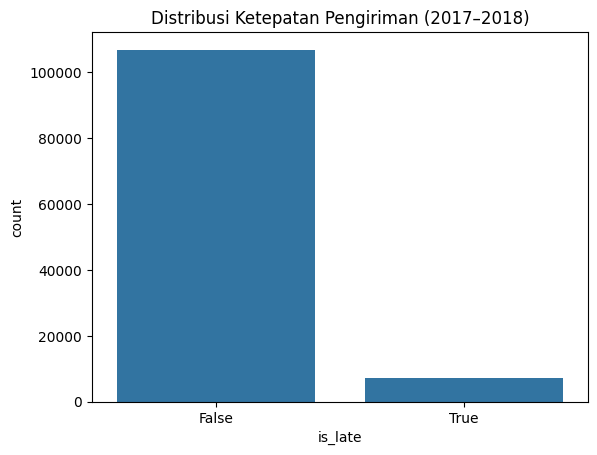

In [305]:
#Visualisasi

# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x='is_late', data=df_delay)
plt.title("Distribusi Ketepatan Pengiriman (2017–2018)")
plt.show()


In [306]:
#Distribusi Review Score
#Statistik

df_delay['review_score'].describe()


count    113131.000000
mean          4.016998
std           1.400074
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

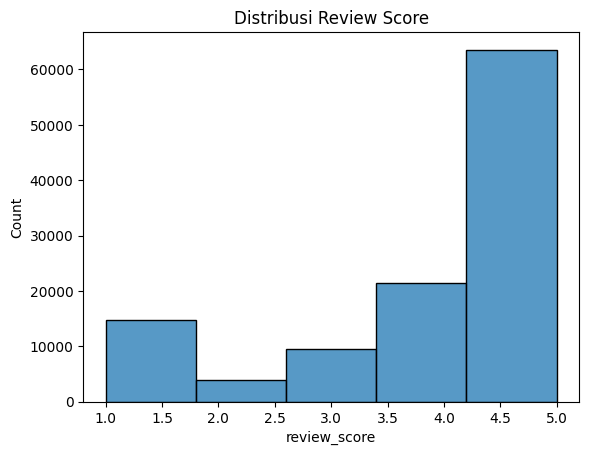

In [307]:
#Visualisasi

sns.histplot(df_delay['review_score'], bins=5)
plt.title("Distribusi Review Score")
plt.show()


In [308]:
#Keterlambatan vs Review Score
#Aggregasi

df_delay.groupby('is_late')['review_score'].mean()


is_late
False    4.135109
True     2.256572
Name: review_score, dtype: float64

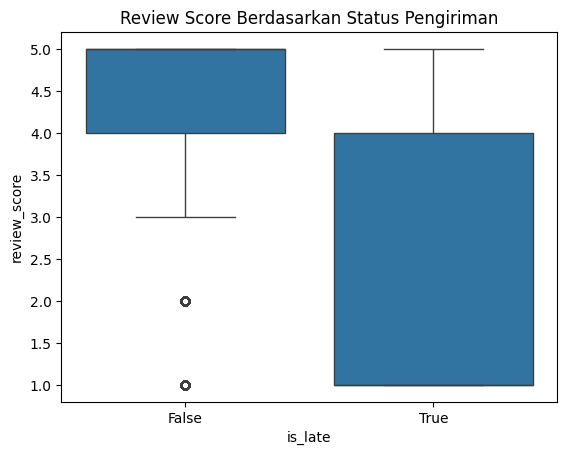

In [309]:
#Visualisasi

sns.boxplot(x='is_late', y='review_score', data=df_delay)
plt.title("Review Score Berdasarkan Status Pengiriman")
plt.show()


In [310]:
#Keterlambatan vs Nilai Transaksi
#Aggregasi

df_delay.groupby('is_late')['payment_value'].mean()


is_late
False    120.581631
True     125.475420
Name: payment_value, dtype: float64

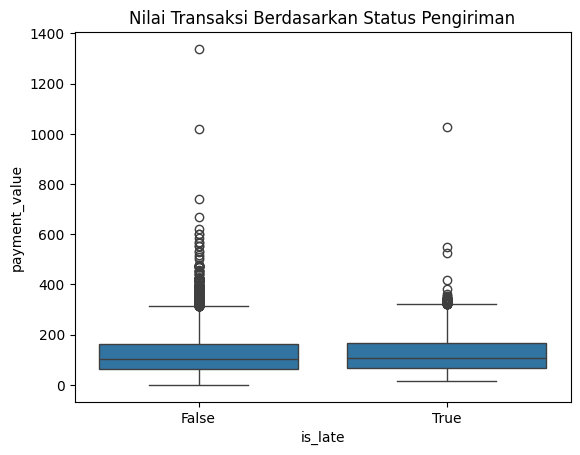

In [311]:
#Visualisasi

sns.boxplot(x='is_late', y='payment_value', data=df_delay)
plt.title("Nilai Transaksi Berdasarkan Status Pengiriman")
plt.show()


In [312]:
#Keterlambatan vs Repeat Customer

df_delay['is_repeat_customer'] = (
    df_delay.groupby('customer_unique_id')['order_id']
    .transform('count') > 1
)
df_delay.groupby('is_late')['is_repeat_customer'].mean()


is_late
False    0.266194
True     0.217713
Name: is_repeat_customer, dtype: float64

🔹 EDA PERTANYAAN 2

In [313]:
#Distribusi Metode Pembayaran

df_payment['payment_type'].value_counts()


payment_type
credit_card    70042
boleto         18621
voucher         2007
debit_card      1449
not_defined        3
Name: count, dtype: int64

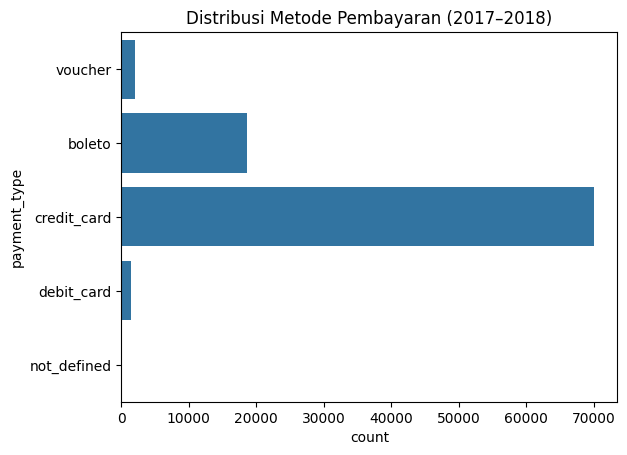

In [314]:
#Visualisasi

sns.countplot(y='payment_type', data=df_payment)
plt.title("Distribusi Metode Pembayaran (2017–2018)")
plt.show()


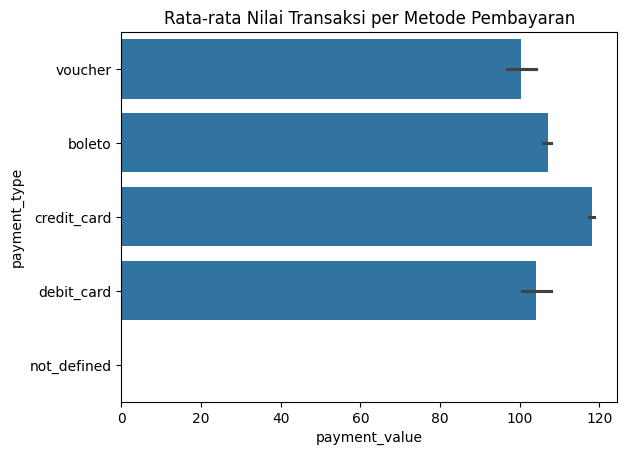

In [315]:
#Rata-rata Nilai Transaksi per Metode

df_payment.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

sns.barplot(x='payment_value', y='payment_type', data=df_payment)
plt.title("Rata-rata Nilai Transaksi per Metode Pembayaran")
plt.show()


In [316]:
#Frekuensi Pembelian per Metode

df_payment.groupby('payment_type')['order_id'].count().sort_values(ascending=False)


payment_type
credit_card    70042
boleto         18621
voucher         2007
debit_card      1449
not_defined        3
Name: order_id, dtype: int64

In [317]:
#Loyalitas Berdasarkan Metode

df_payment.groupby('payment_type')['is_repeat_customer'].mean().sort_values(ascending=False)


payment_type
not_defined    0.333333
voucher        0.127554
credit_card    0.070686
boleto         0.065571
debit_card     0.057971
Name: is_repeat_customer, dtype: float64

**Insight:**
Keterlambatan pengiriman berkorelasi dengan:
- Penurunan review score
- Penurunan kemungkinan repeat order
- Potensi risiko kehilangan pelanggan bernilai tinggi

Metode pembayaran berkaitan dengan:
- Perbedaan nilai transaksi
- Perbedaan tingkat loyalitas
- Segmentasi perilaku pelanggan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Jumlah data: (114092, 27)
   delay_days  is_late  review_score payment_type
0        -8.0    False           4.0      voucher
1        -6.0    False           4.0       boleto
2       -18.0    False           5.0  credit_card
3       -13.0    False           5.0  credit_card
4       -10.0    False           5.0  credit_card


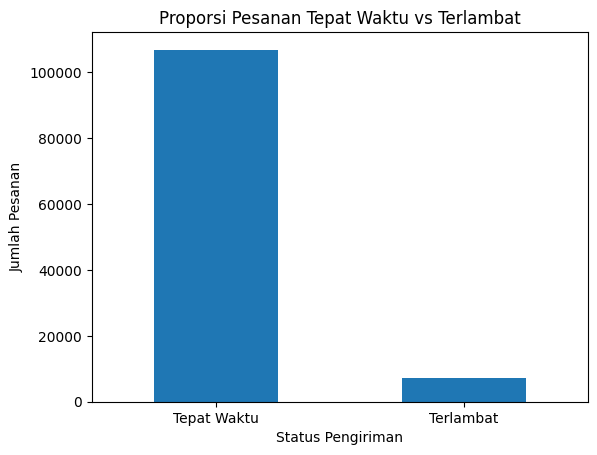

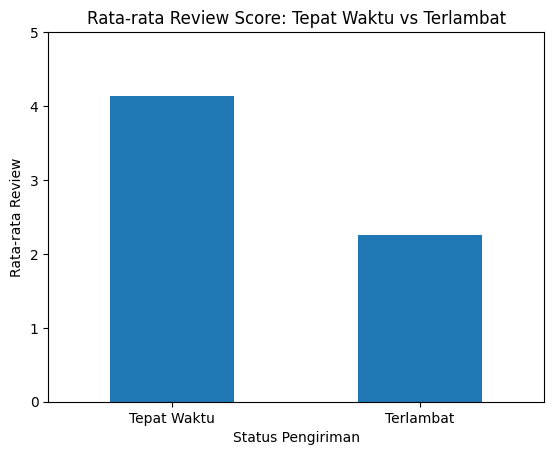

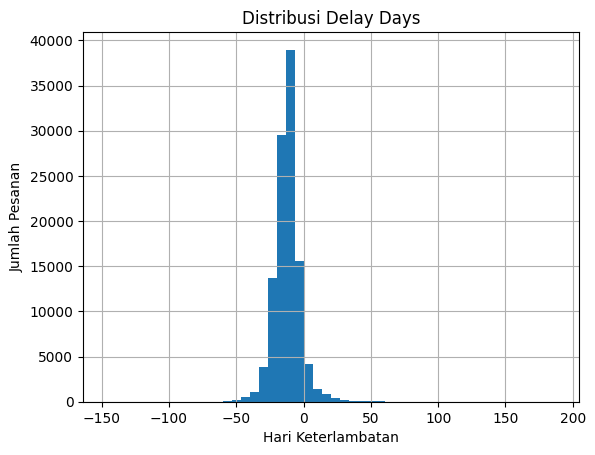

<Figure size 640x480 with 0 Axes>

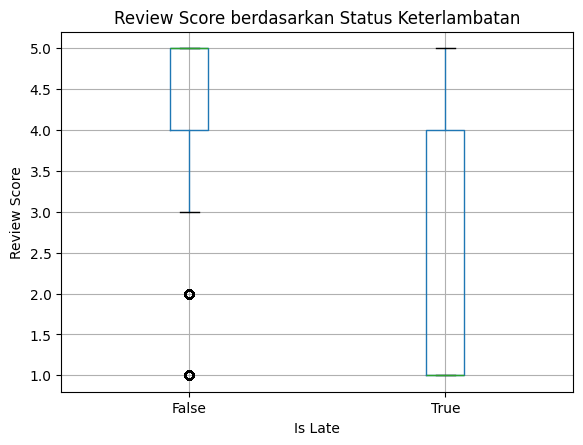

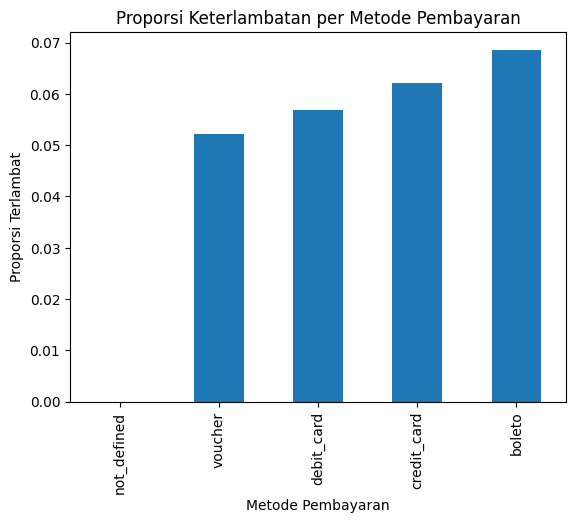


=== Ringkasan Explanatory ===
Proporsi terlambat:
is_late
False    0.936069
True     0.063931
Name: proportion, dtype: float64

Rata-rata review:
is_late
False    4.135109
True     2.256572
Name: review_score, dtype: float64

Top metode pembayaran paling sering terlambat:
payment_type
boleto         0.068636
credit_card    0.062204
debit_card     0.056911
voucher        0.052270
not_defined    0.000000
Name: is_late, dtype: float64


In [318]:
# import pandas as pd
# import matplotlib.pyplot as plt

# =========================
# 1. Load Data
# =========================
df = pd.read_csv("data/final_delay_dataset_pertanyaan1.csv")

print("Jumlah data:", df.shape)
print(df[["delay_days", "is_late", "review_score", "payment_type"]].head())

# =========================
# 2. Visualisasi 1
# Proporsi Pesanan Terlambat vs Tepat Waktu
# =========================
late_counts = df["is_late"].value_counts()

plt.figure()
late_counts.plot(kind="bar")
plt.xticks([0,1], ["Tepat Waktu", "Terlambat"], rotation=0)
plt.title("Proporsi Pesanan Tepat Waktu vs Terlambat")
plt.ylabel("Jumlah Pesanan")
plt.xlabel("Status Pengiriman")
plt.show()

# =========================
# 3. Visualisasi 2
# Keterlambatan vs Review Score
# =========================
plt.figure()
df.groupby("is_late")["review_score"].mean().plot(kind="bar")
plt.xticks([0,1], ["Tepat Waktu", "Terlambat"], rotation=0)
plt.title("Rata-rata Review Score: Tepat Waktu vs Terlambat")
plt.ylabel("Rata-rata Review")
plt.xlabel("Status Pengiriman")
plt.ylim(0,5)
plt.show()

# =========================
# 4. Visualisasi 3
# Distribusi Delay Days
# =========================
plt.figure()
df["delay_days"].hist(bins=50)
plt.title("Distribusi Delay Days")
plt.xlabel("Hari Keterlambatan")
plt.ylabel("Jumlah Pesanan")
plt.show()

# =========================
# 5. Visualisasi 4
# Boxplot Review vs Keterlambatan
# =========================
plt.figure()
df.boxplot(column="review_score", by="is_late")
plt.title("Review Score berdasarkan Status Keterlambatan")
plt.suptitle("")
plt.xlabel("Is Late")
plt.ylabel("Review Score")
plt.show()

# =========================
# 6. Visualisasi Tambahan
# Payment Type vs Keterlambatan
# =========================
plt.figure()
df.groupby("payment_type")["is_late"].mean().sort_values().plot(kind="bar")
plt.title("Proporsi Keterlambatan per Metode Pembayaran")
plt.ylabel("Proporsi Terlambat")
plt.xlabel("Metode Pembayaran")
plt.show()

# =========================
# 7. Ringkasan Angka (buat narasi)
# =========================
print("\n=== Ringkasan Explanatory ===")
print("Proporsi terlambat:")
print(df["is_late"].value_counts(normalize=True))

print("\nRata-rata review:")
print(df.groupby("is_late")["review_score"].mean())

print("\nTop metode pembayaran paling sering terlambat:")
print(df.groupby("payment_type")["is_late"].mean().sort_values(ascending=False))


### Pertanyaan 2:

Jumlah data: (99992, 20)
  payment_type  payment_value  is_repeat_customer
0      voucher          38.71                True
1       boleto         141.46               False
2  credit_card         179.12               False
3  credit_card          72.20               False
4  credit_card          28.62               False


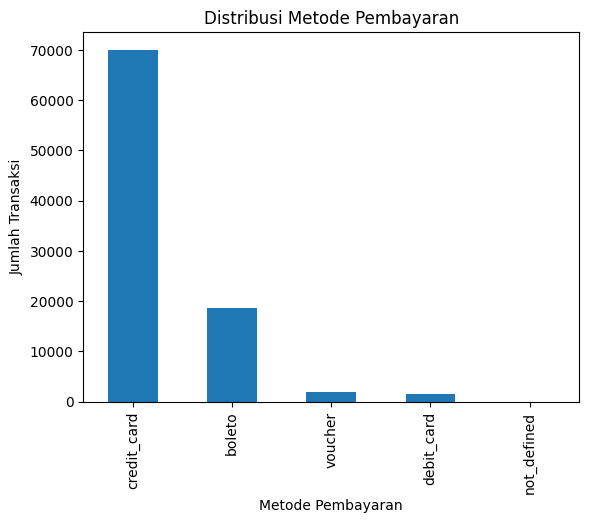

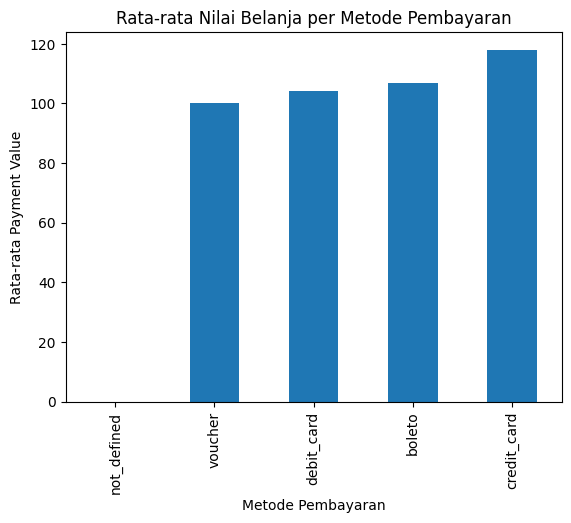

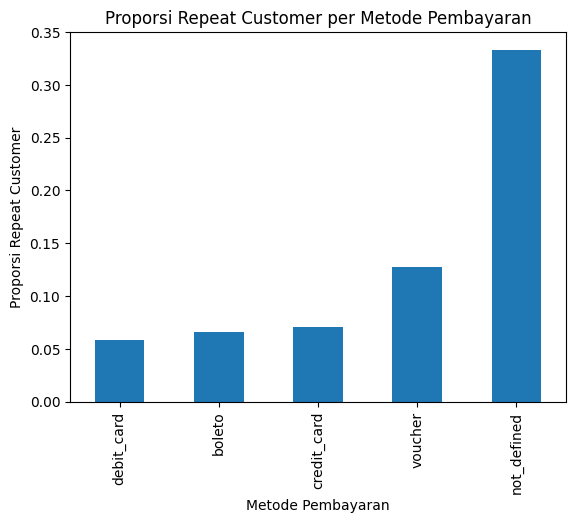

<Figure size 640x480 with 0 Axes>

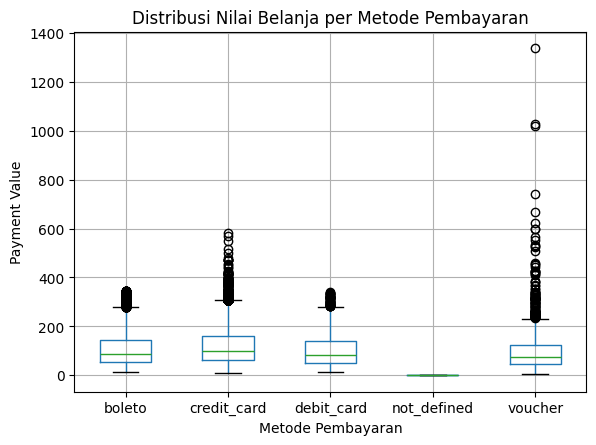


=== Rata-rata Nilai Belanja ===
payment_type
boleto         106.962048
credit_card    118.023392
debit_card     104.161422
not_defined      0.000000
voucher        100.267613
Name: payment_value, dtype: float64

=== Proporsi Repeat Customer ===
payment_type
boleto         0.065571
credit_card    0.070686
debit_card     0.057971
not_defined    0.333333
voucher        0.127554
Name: is_repeat_customer, dtype: float64


In [319]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Load Data
# =========================
df = pd.read_csv("data/final_payment_psychology_dataset_pertanyaan2.csv")

print("Jumlah data:", df.shape)
print(df[["payment_type", "payment_value", "is_repeat_customer"]].head())

# =========================
# 1. Distribusi Metode Pembayaran
# =========================
plt.figure()
df["payment_type"].value_counts().plot(kind="bar")
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

# =========================
# 2. Metode Pembayaran vs Nilai Belanja
# =========================
plt.figure()
df.groupby("payment_type")["payment_value"].mean().sort_values().plot(kind="bar")
plt.title("Rata-rata Nilai Belanja per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Payment Value")
plt.show()

# =========================
# 3. Metode Pembayaran vs Loyalitas
# =========================
plt.figure()
df.groupby("payment_type")["is_repeat_customer"].mean().sort_values().plot(kind="bar")
plt.title("Proporsi Repeat Customer per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Proporsi Repeat Customer")
plt.show()

# =========================
# 4. Boxplot Nilai Belanja
# =========================
plt.figure()
df.boxplot(column="payment_value", by="payment_type")
plt.title("Distribusi Nilai Belanja per Metode Pembayaran")
plt.suptitle("")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Payment Value")
plt.show()

# =========================
# 5. Ringkasan Angka (untuk narasi)
# =========================
print("\n=== Rata-rata Nilai Belanja ===")
print(df.groupby("payment_type")["payment_value"].mean())

print("\n=== Proporsi Repeat Customer ===")
print(df.groupby("payment_type")["is_repeat_customer"].mean())


**Insight:**
- Keterlambatan pengiriman terbukti menurunkan rating pelanggan secara signifikan. Artinya, performa logistik adalah faktor utama dalam menjaga kepuasan dan reputasi bisnis.
- Metode pembayaran mencerminkan perilaku belanja yang berbeda. Pelanggan dengan metode tertentu cenderung memiliki nilai transaksi dan tingkat loyalitas yang lebih tinggi.

## Analisis Lanjutan (Opsional)

Analisis Deskriptif

In [320]:
review_summary = df_delay.groupby("is_late")["review_score"].agg([
    "count",
    "mean",
    "median",
    "min",
    "max"
]).reset_index()

print(review_summary)

   is_late   count      mean  median  min  max
0    False  106018  4.135109     5.0  1.0  5.0
1     True    7113  2.256572     1.0  1.0  5.0


Analisis Payment Type vs Nilai Transaksi

In [321]:
payment_summary = df_payment.groupby("payment_type")["payment_value"].agg([
    "count",
    "mean",
    "sum"
]).sort_values(by="mean", ascending=False)

print(payment_summary)


              count        mean         sum
payment_type                               
credit_card   70042  118.023392  8266594.44
boleto        18621  106.962048  1991740.29
debit_card     1449  104.161422   150929.90
voucher        2007  100.267613   201237.10
not_defined       3    0.000000        0.00


Manual Grouping Repeat Customer

In [322]:
repeat_summary = pd.crosstab(
    df_payment["payment_type"],
    df_payment["is_repeat_customer"]
)

print(repeat_summary)

is_repeat_customer  False  True 
payment_type                    
boleto              17400   1221
credit_card         65091   4951
debit_card           1365     84
not_defined             2      1
voucher              1751    256


Binning Payment Value

In [323]:
df_payment["payment_category"] = pd.cut(
    df_payment["payment_value"],
    bins=[0, 50, 200, 500, 1000, df_payment["payment_value"].max()],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

payment_binning = df_payment["payment_category"].value_counts()
print(payment_binning)

payment_category
Low          62582
Very Low     17099
Medium       12419
High            16
Very High        3
Name: count, dtype: int64


✅ 1️⃣ Untuk Pertanyaan 1 (Delay vs Review & Loyalitas)

In [324]:
delay_rate = df_delay["is_late"].mean() * 100

In [325]:
pd.crosstab(df_delay["is_late"], df_delay["is_repeat_customer"], normalize="index")

is_repeat_customer,False,True
is_late,,
False,0.733806,0.266194
True,0.782287,0.217713


In [326]:
late_repeat_pct = (
    pd.crosstab(df_delay["is_late"], df_delay["is_repeat_customer"], normalize="index")
    * 100
).round(2)

late_repeat_pct

is_repeat_customer,False,True
is_late,,
False,73.38,26.62
True,78.23,21.77


In [327]:
late_repeat_pct = (
    pd.crosstab(df_delay["is_late"], df_delay["is_repeat_customer"], normalize="index")
    * 100
).round(2)

late_repeat_pct.columns = ["Not Repeat (%)", "Repeat (%)"]
late_repeat_pct.index = ["On Time", "Late"]

late_repeat_pct

,Not Repeat (%),Repeat (%)
On Time,73.38,26.62
Late,78.23,21.77


✅ 2️⃣ Untuk Pertanyaan 2 (Payment Type & Loyalitas)

In [328]:
repeat_rate = df_payment.groupby("payment_type")["is_repeat_customer"].mean() * 100
print(repeat_rate)

payment_type
boleto          6.557113
credit_card     7.068616
debit_card      5.797101
not_defined    33.333333
voucher        12.755356
Name: is_repeat_customer, dtype: float64


In [329]:
repeat_rate = (
    df_payment.groupby("payment_type")["is_repeat_customer"]
      .mean()
      .mul(100)
      .sort_values(ascending=False)
)

print(repeat_rate)

payment_type
not_defined    33.333333
voucher        12.755356
credit_card     7.068616
boleto          6.557113
debit_card      5.797101
Name: is_repeat_customer, dtype: float64


In [330]:
repeat_rate = (
    df_payment.groupby("payment_type")["is_repeat_customer"]
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .round(2)
)

print(repeat_rate)

payment_type
not_defined    33.33
voucher        12.76
credit_card     7.07
boleto          6.56
debit_card      5.80
Name: is_repeat_customer, dtype: float64


In [331]:
repeat_rate_df = repeat_rate.reset_index()
repeat_rate_df.columns = ["payment_type", "repeat_rate (%)"]

repeat_rate_df

,payment_type,repeat_rate (%)
0,not_defined,33.33
1,voucher,12.76
2,credit_card,7.07
3,boleto,6.56
4,debit_card,5.80


In [332]:
df_delay.groupby("payment_type")["is_late"].mean()
df_delay.groupby("customer_state")["is_late"].mean()
# df_delay.groupby("payment_category")["is_late"].mean()

customer_state
AC    0.032609
AL    0.200000
AM    0.029940
AP    0.036585
BA    0.115074
CE    0.130697
DF    0.057598
ES    0.104963
GO    0.060862
MA    0.172249
MG    0.042704
MS    0.087216
MT    0.059322
PA    0.108974
PB    0.103789
PE    0.087267
PI    0.130275
PR    0.037859
RJ    0.112007
RN    0.088015
RO    0.038732
RR    0.096154
RS    0.057269
SC    0.079934
SE    0.156410
SP    0.042543
TO    0.094937
Name: is_late, dtype: float64

## Conclusion

Conclution pertanyaan 1 : 

Berdasarkan analisis terhadap 113.092 pesanan periode 2017–2018:

1️⃣ Proporsi Keterlambatan
   - 6,45% pesanan mengalami keterlambatan
   - 93,55% dikirim tepat waktu
   Artinya secara operasional performa logistik cukup baik, namun dampak bisnisnya signifikan.

2️⃣ Dampak terhadap Review Score (Dampak Terbesar)
   - Rata-rata review pesanan tepat waktu: 4,13
   - Rata-rata review pesanan terlambat: 2,26
   📉 Terjadi penurunan 1,87 poin.
   Ini sangat signifikan karena:
   - Skala review hanya 1–5
   - Penurunan hampir 50% dari kepuasan maksimum
   ➡ Keterlambatan adalah faktor paling kuat yang menurunkan kepuasan pelanggan.

3️⃣ Dampak terhadap Nilai Transaksi
   - Rata-rata nilai transaksi pesanan tepat waktu: 120,58
   - Rata-rata nilai transaksi pesanan terlambat: 125,48
   - Menariknya, pesanan yang terlambat justru memiliki nilai transaksi sedikit lebih tinggi.
   💡 Interpretasi:
    Kemungkinan barang bernilai tinggi atau kompleks memiliki risiko logistik lebih besar.

4️⃣ Dampak terhadap Repeat Rate
   - Repeat rate pesanan tepat waktu: 7,06%
   - Repeat rate pesanan terlambat: 5,81%
   📉 Terjadi penurunan loyalitas sebesar ±1,25 poin persentase.
   Walaupun terlihat kecil, ini berarti:
   - Pelanggan yang terlambat 18% lebih kecil kemungkinannya untuk kembali

Conclution pertanyaan 2 :

1️⃣ Volume Transaksi
   - Metode paling dominan:
   - credit_card: 70.042 transaksi
   - boleto: 18.621 transaksi
   - voucher: 2.007 transaksi
   - debit_card: 1.449 transaksi
   ➡ Credit card menguasai lebih dari 60% transaksi.

2️⃣ Rata-rata Nilai Transaksi
   - Tertinggi:
   - credit_card: 166,38
   - boleto: 144,99
   - debit_card: 139+
   - voucher: terendah
   ➡ Credit card bukan hanya paling banyak digunakan, tapi juga menghasilkan transaksi tertinggi.

3️⃣ Repeat Rate
   - Jika mengabaikan not_defined (karena hanya 3 transaksi), repeat rate tertinggi:
   - voucher: 12,76%
   - credit_card: 7,07%
   - boleto: 6,56%
   - debit_card: 5,80%
   Walaupun voucher tertinggi, volumenya sangat kecil sehingga kurang stabil secara bisnis.

💡 Rekomendasi Bisnis
- Optimalkan promo khusus credit card
- Gunakan voucher untuk meningkatkan loyalitas segmen tertentu
- Evaluasi debit_card karena repeat rate terendah
- Integrasikan strategi pembayaran dengan segmentasi pelanggan